In [1]:
'''
Build a suggorate model for the data
there are 2 ML models that want to build
if there are 3 dataset, then there are 6 models after training
'''

'\nBuild a suggorate model for the data\nthere are 2 ML models that want to build\nif there are 3 dataset, then there are 6 models after training\n'

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as m
import xgboost as xgb
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#draw figure of train test split distribution
def draw_distribution(train, val, test, title):
    train_distribution_lr_predicted = train.value_counts(title)
    train_distribution_lr_predicted = train_distribution_lr_predicted.reset_index()
    train_distribution_lr_predicted["class"] = "train"

    val_distribution_lr_predicted = val.value_counts(title)
    val_distribution_lr_predicted = val_distribution_lr_predicted.reset_index()
    val_distribution_lr_predicted["class"] = "validation"

    test_distribution_lr_predicted = test.value_counts(title)
    test_distribution_lr_predicted = test_distribution_lr_predicted.reset_index()
    test_distribution_lr_predicted["class"] = "test"

    total_distribution_lr_predicted = pd.concat([train_distribution_lr_predicted, val_distribution_lr_predicted, test_distribution_lr_predicted])

    total_distribution_lr_predicted.columns = [title, "Count", "class"]
    grade_map = {
        0: "Benign",
        1: "Malicious"}
    total_distribution_lr_predicted["Label"] = total_distribution_lr_predicted[title].map(grade_map)

    ax = sns.barplot(x="class", y="Count", hue=title, data=total_distribution_lr_predicted, palette="Blues" )
    ax.bar_label(ax.containers[0], label_type='edge')
    ax.bar_label(ax.containers[1], label_type='edge')

In [4]:
def Preprocess_GAN(train, labelName):
        
    # min max standardization
    scaler = MinMaxScaler()

    # 選擇所有數值型列，並移除"BwdPSHFlags"
    numeric_columns = list(train.select_dtypes(include=['int', "float"]).columns)
    numeric_columns.remove("BwdPSHFlags")

    # 對每一個數值型列進行縮放
    for c in numeric_columns:
        train[c] = scaler.fit_transform(train[[c]])

    #  1: annomaly; 0: normaly
    # train["DT_Predicted"] = train["DT_Predicted"].map(lambda x: 1 if x == "anomaly" else 0)
    # get all rows of malicious traffic, and all columns except the last one
    raw_attack = np.array(train[train[labelName] == 1])[:, :-1]
    # get all rows of benign traffic, and all columns except the last one
    normal = np.array(train[train[labelName] == 0])[:, :-1]
    
    # get the true label of the train set
    true_label = train[labelName]

    del train[labelName]

    return train, true_label

In [5]:
train_lr_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/train_lr_predicted.csv')
val_lr_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/val_lr_predicted.csv')
test_lr_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_lr_predicted.csv')

train_dt_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/train_dt_predicted.csv')
val_dt_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/val_dt_predicted.csv')
test_dt_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_dt_predicted.csv')

train_xgb_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/train_xgb_predicted.csv')
val_xgb_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/val_xgb_predicted.csv')
test_xgb_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_xgb_predicted.csv')

train_dnn_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/train_dnn_predicted.csv')
val_dnn_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/val_dnn_predicted.csv')
test_dnn_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_dnn_predicted.csv')


# X_train_lr_predicted, y_train_lr_predicted = train_lr_predicted.drop(columns=['LR_Predicted'], axis=1), train_lr_predicted['LR_Predicted']
# X_val_lr_predicted, y_val_lr_predicted = val_lr_predicted.drop(columns=['LR_Predicted'], axis=1), val_lr_predicted['LR_Predicted']
# X_test_lr_predicted, y_test_lr_predicted = test_lr_predicted.drop(columns=['LR_Predicted'], axis=1), test_lr_predicted['LR_Predicted']

# X_train_dt_predicted, y_train_dt_predicted = train_dt_predicted.drop(columns=['DT_Predicted'], axis=1), train_dt_predicted['DT_Predicted']
# X_val_dt_predicted, y_val_dt_predicted = val_dt_predicted.drop(columns=['DT_Predicted'], axis=1), val_dt_predicted['DT_Predicted']
# X_test_dt_predicted, y_test_dt_predicted = test_dt_predicted.drop(columns=['DT_Predicted'], axis=1), test_dt_predicted['DT_Predicted']

# X_train_xgb_predicted, y_train_xgb_predicted = train_xgb_predicted.drop(columns=['XGB_Predicted'], axis=1), train_xgb_predicted['XGB_Predicted']
# X_val_xgb_predicted, y_val_xgb_predicted = val_xgb_predicted.drop(columns=['XGB_Predicted'], axis=1), val_xgb_predicted['XGB_Predicted']    
# X_test_xgb_predicted, y_test_xgb_predicted = test_xgb_predicted.drop(columns=['XGB_Predicted'], axis=1), test_xgb_predicted['XGB_Predicted']

# X_train_dnn_predicted, y_train_dnn_predicted = train_dnn_predicted.drop(columns=['DNN_Predicted'], axis=1), train_dnn_predicted['DNN_Predicted']
# X_val_dnn_predicted, y_val_dnn_predicted = val_dnn_predicted.drop(columns=['DNN_Predicted'], axis=1), val_dnn_predicted['DNN_Predicted']
# X_test_dnn_predicted, y_test_dnn_predicted = test_dnn_predicted.drop(columns=['DNN_Predicted'], axis=1), test_dnn_predicted['DNN_Predicted']

X_train_lr_predicted, y_train_lr_predicted  = Preprocess_GAN(train_lr_predicted, "LR_Predicted")
X_val_lr_predicted, y_val_lr_predicted = Preprocess_GAN(val_lr_predicted, "LR_Predicted")
X_test_lr_predicted, y_test_lr_predicted = Preprocess_GAN(test_lr_predicted, "LR_Predicted")

X_train_dt_predicted, y_train_dt_predicted = Preprocess_GAN(train_dt_predicted, "DT_Predicted")
X_val_dt_predicted, y_val_dt_predicted = Preprocess_GAN(val_dt_predicted, "DT_Predicted")
X_test_dt_predicted, y_test_dt_predicted = Preprocess_GAN(test_dt_predicted, "DT_Predicted")

X_train_xgb_predicted, y_train_xgb_predicted = Preprocess_GAN(train_xgb_predicted, "XGB_Predicted")
X_val_xgb_predicted, y_val_xgb_predicted = Preprocess_GAN(val_xgb_predicted, "XGB_Predicted")
X_test_xgb_predicted, y_test_xgb_predicted = Preprocess_GAN(test_xgb_predicted, "XGB_Predicted")

X_train_dnn_predicted, y_train_dnn_predicted = Preprocess_GAN(train_dnn_predicted, "DNN_Predicted")
X_val_dnn_predicted, y_val_dnn_predicted = Preprocess_GAN(val_dnn_predicted, "DNN_Predicted")
X_test_dnn_predicted, y_test_dnn_predicted = Preprocess_GAN(test_dnn_predicted, "DNN_Predicted")


In [6]:
#draw distribution
#logistic regression
#draw_distribution(train_lr_predicted, val_lr_predicted, test_lr_predicted, 'LR_Predicted')

#decision tree
# draw_distribution(train_dt_predicted, val_dt_predicted, test_dt_predicted, 'DT_Predicted')

#sgboost
# draw_distribution(train_xgb_predicted, val_xgb_predicted, test_xgb_predicted, 'XGB_Predicted')

## dnn
# draw_distribution(train_dnn_predicted, val_dnn_predicted, test_dnn_predicted, 'DNN_Predicted')

In [7]:
# buile model
# retuen model, y_pred
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import xgboost as xgb

def model_train(modelname, X_train_predicted, y_train_predicted, X_test_predicted, y_test_predicted, X_val_predicted, y_val_predicted, dataset_resource):
    if modelname == 'LogisticRegression':
        model = LogisticRegression()
        model.fit(X_train_predicted, y_train_predicted)
    elif modelname == 'DecisionTree':
        model = DecisionTreeClassifier()
        model.fit(X_train_predicted, y_train_predicted)
    elif modelname == 'XGBoost':
        model = xgb.XGBClassifier()
        model.fit(X_train_predicted, y_train_predicted)
        
        
    print(modelname)
    print("dataset_resource: ", dataset_resource)
    # Testing
    start_test = time.time()
    y_pred = model.predict(X_test_predicted)
    acc_test = accuracy_score(y_test_predicted, y_pred)
    recall_score_test = recall_score(y_test_predicted, y_pred, average='weighted')
    end_test = time.time()
    testing_time = end_test - start_test


    # Validation
    start_validation = time.time()
    y_val =  model.predict(X_val_predicted)
    val_acc = accuracy_score(y_val_predicted, y_val)
    recall_score_val = recall_score(y_val_predicted, y_val, average='weighted')
    end_validation = time.time()
    validation_time = end_validation - start_validation

    # Results
    print("Accuracy: ", acc_test)
    print("Recall: ", recall_score_test)
    print("Validation Accuracy: ", val_acc)
    print("Validation Recall: ", recall_score_val)
    print("Confusion matrix: \n", confusion_matrix(y_test_predicted, y_pred))
    print("Classification report: \n\n", classification_report(y_test_predicted, y_pred, target_names=['Benign', 'Malicious'], digits=4))
    return model, y_pred

In [8]:
# draw confusion matrix

def draw_confusion_matrix(y_test, y_pred, model, model_name, dataset_resource):
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    total = np.sum(cm)
    confusion_percentage = (cm  / total) * 100

    strings = np.asarray([['%', '%'],
                        ['%', '%']])
    labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
    plt.figure(figsize=(8,5))
    sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'], annot_kws={"size": 10})
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title(f'Confusion Matrix of {model_name} Surrogate Model', fontsize=15)
    # add accuracy
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    plt.text(0.5, 2.5, f'Dataset from: {dataset_resource}', dict(size=12))
    
    plt.show()

### Logostic Regression

In [9]:

lr_model_from_lrdata, y_lrpred_from_lrdata = model_train('LogisticRegression', X_train_lr_predicted, y_train_lr_predicted, X_test_lr_predicted, y_test_lr_predicted, X_val_lr_predicted, y_val_lr_predicted, 'lr')
lr_model_from_dtdata, y_lrpred_from_dtdata = model_train('LogisticRegression', X_train_dt_predicted, y_train_dt_predicted, X_test_dt_predicted, y_test_dt_predicted, X_val_dt_predicted, y_val_dt_predicted, 'dt')
lr_model_from_xgbdata, y_lrpred_from_xgbdata = model_train('LogisticRegression', X_train_xgb_predicted, y_train_xgb_predicted, X_test_xgb_predicted, y_test_xgb_predicted, X_val_xgb_predicted, y_val_xgb_predicted, 'xgb')
lr_model_from_dnndata, y_lrpred_from_dnndata = model_train('LogisticRegression', X_train_dnn_predicted, y_train_dnn_predicted, X_test_dnn_predicted, y_test_dnn_predicted, X_val_dnn_predicted, y_val_dnn_predicted, 'dnn')



LogisticRegression
dataset_resource:  lr
Accuracy:  0.9696906788457547
Recall:  0.9696906788457547
Validation Accuracy:  0.9725970521071207
Validation Recall:  0.9725970521071207
Confusion matrix: 
 [[22214   156]
 [  574  1141]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9748    0.9930    0.9838     22370
   Malicious     0.8797    0.6653    0.7576      1715

    accuracy                         0.9697     24085
   macro avg     0.9273    0.8292    0.8707     24085
weighted avg     0.9680    0.9697    0.9677     24085

LogisticRegression
dataset_resource:  dt
Accuracy:  0.923853020552211
Recall:  0.923853020552211
Validation Accuracy:  0.9212165248079718
Validation Recall:  0.9212165248079718
Confusion matrix: 
 [[21231  1646]
 [  188  1020]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9912    0.9281    0.9586     22877
   Malicious     0.3826    0.8444    0.5266      1208


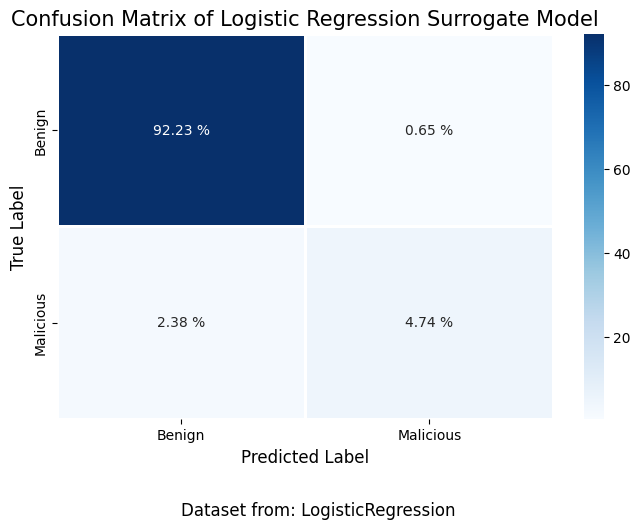

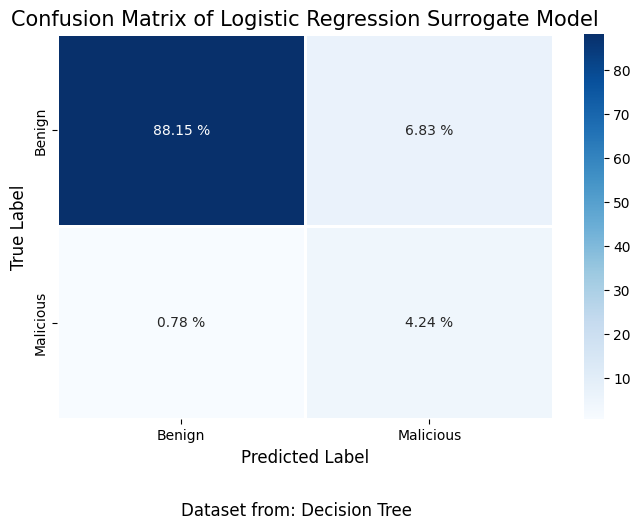

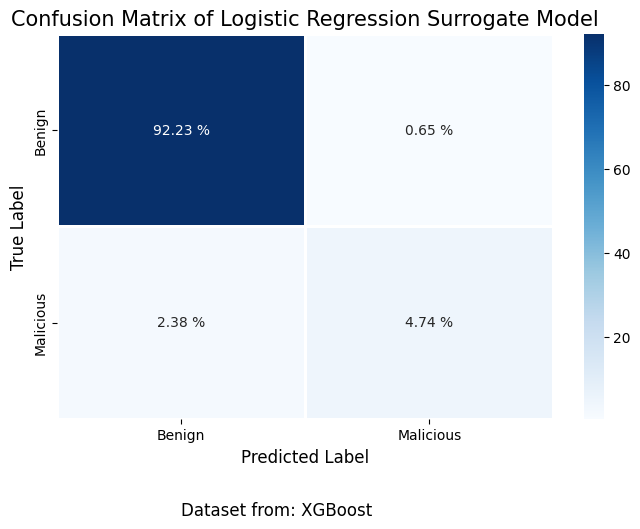

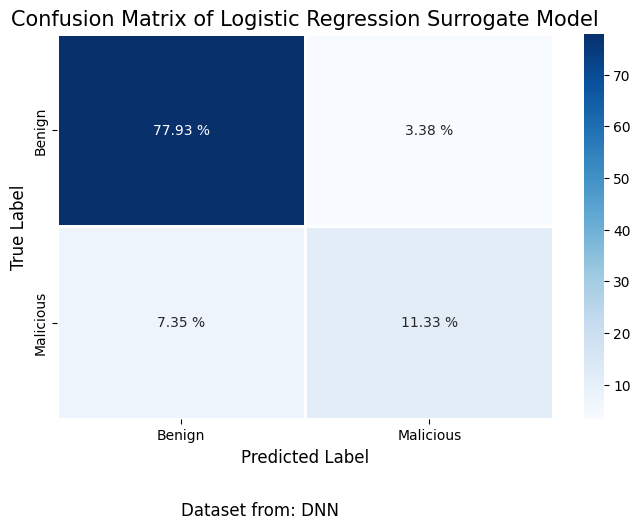

In [10]:

draw_confusion_matrix(y_test_lr_predicted, y_lrpred_from_lrdata, lr_model_from_lrdata, 'Logistic Regression', "LogisticRegression")
draw_confusion_matrix(y_test_dt_predicted, y_lrpred_from_dtdata, lr_model_from_dtdata, 'Logistic Regression', "Decision Tree")
draw_confusion_matrix(y_test_xgb_predicted, y_lrpred_from_xgbdata, lr_model_from_xgbdata, 'Logistic Regression', "XGBoost")
draw_confusion_matrix(y_test_dnn_predicted, y_lrpred_from_dnndata, lr_model_from_dnndata, 'Logistic Regression', "DNN")

### DecisionTree

In [11]:
dt_model_from_lrdata, y_dtpred_from_lrdata = model_train('DecisionTree', X_train_lr_predicted, y_train_lr_predicted, X_test_lr_predicted, y_test_lr_predicted, X_val_lr_predicted, y_val_lr_predicted, 'lr')
dt_model_from_dtdata, y_dtpred_from_dtdata = model_train('DecisionTree', X_train_dt_predicted, y_train_dt_predicted, X_test_dt_predicted, y_test_dt_predicted, X_val_dt_predicted, y_val_dt_predicted, 'dt')
dt_model_from_xgbdata, y_dtpred_from_xgbdata = model_train('DecisionTree', X_train_xgb_predicted, y_train_xgb_predicted, X_test_xgb_predicted, y_test_xgb_predicted, X_val_xgb_predicted, y_val_xgb_predicted, 'xgb')
dt_model_from_dnndata, y_dtpred_from_dnndata = model_train('DecisionTree', X_train_dnn_predicted, y_train_dnn_predicted, X_test_dnn_predicted, y_test_dnn_predicted, X_val_dnn_predicted, y_val_dnn_predicted, 'dnn')

DecisionTree
dataset_resource:  lr
Accuracy:  0.9468964085530414
Recall:  0.9468964085530414
Validation Accuracy:  0.9465434917998754
Validation Recall:  0.9465434917998754
Confusion matrix: 
 [[22317    53]
 [ 1226   489]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9479    0.9976    0.9721     22370
   Malicious     0.9022    0.2851    0.4333      1715

    accuracy                         0.9469     24085
   macro avg     0.9251    0.6414    0.7027     24085
weighted avg     0.9447    0.9469    0.9338     24085

DecisionTree
dataset_resource:  dt
Accuracy:  0.9743823956819597
Recall:  0.9743823956819597
Validation Accuracy:  0.9059580651858002
Validation Recall:  0.9059580651858002
Confusion matrix: 
 [[22821    56]
 [  561   647]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9760    0.9976    0.9867     22877
   Malicious     0.9203    0.5356    0.6771      1208

    accur

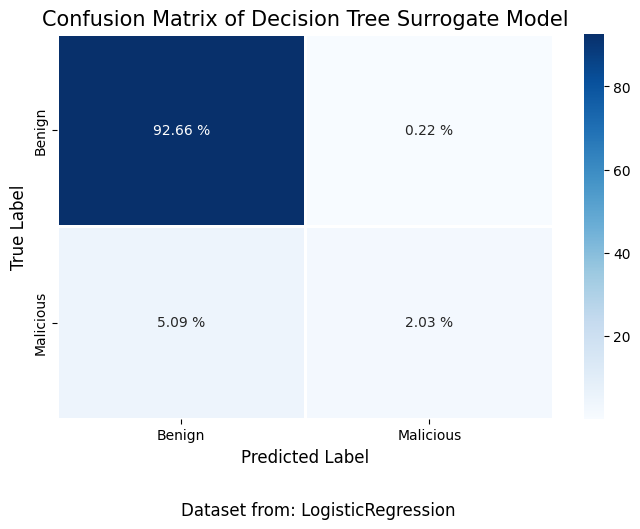

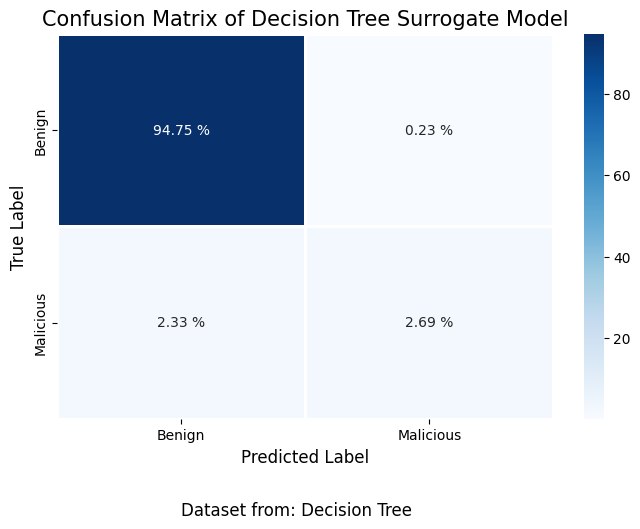

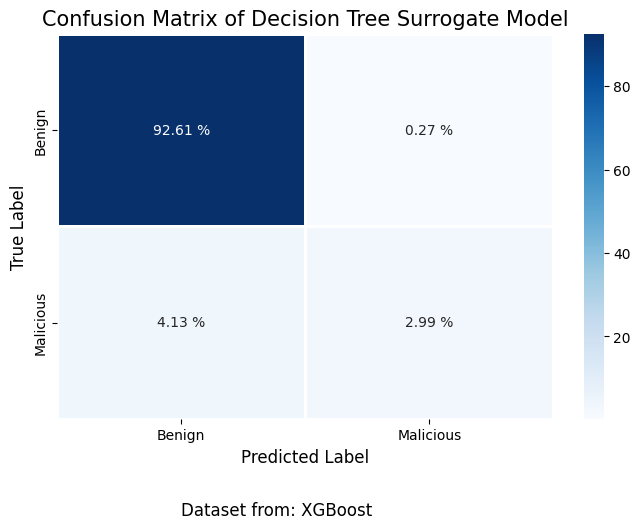

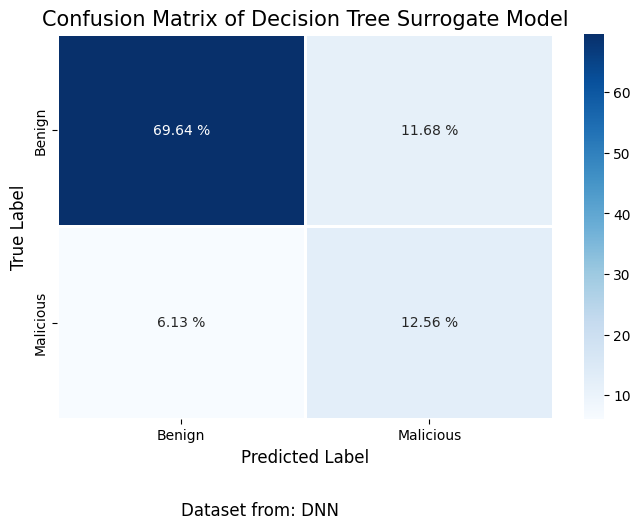

In [12]:
draw_confusion_matrix(y_test_lr_predicted, y_dtpred_from_lrdata, dt_model_from_lrdata, 'Decision Tree', "LogisticRegression")
draw_confusion_matrix(y_test_dt_predicted, y_dtpred_from_dtdata, dt_model_from_dtdata, 'Decision Tree', "Decision Tree")
draw_confusion_matrix(y_test_xgb_predicted, y_dtpred_from_xgbdata, dt_model_from_xgbdata, 'Decision Tree', "XGBoost")
draw_confusion_matrix(y_test_dnn_predicted, y_dtpred_from_dnndata, dt_model_from_dnndata, 'Decision Tree', "DNN")

### XGBoost

In [13]:
xgb_model_from_lrdata, y_xgbpred_from_lrdata = model_train('XGBoost', X_train_lr_predicted, y_train_lr_predicted, X_test_lr_predicted, y_test_lr_predicted, X_val_lr_predicted, y_val_lr_predicted, 'lr')
xgb_model_from_dtdata, y_xgbpred_from_dtdata = model_train('XGBoost', X_train_dt_predicted, y_train_dt_predicted, X_test_dt_predicted, y_test_dt_predicted, X_val_dt_predicted, y_val_dt_predicted, 'dt')
xgb_model_from_xgbdata, y_xgbpred_from_xgbdata = model_train('XGBoost', X_train_xgb_predicted, y_train_xgb_predicted, X_test_xgb_predicted, y_test_xgb_predicted, X_val_xgb_predicted, y_val_xgb_predicted, 'xgb')
xgb_model_from_dnndata, y_xgbpred_from_dnndata = model_train('XGBoost', X_train_dnn_predicted, y_train_dnn_predicted, X_test_dnn_predicted, y_test_dnn_predicted, X_val_dnn_predicted, y_val_dnn_predicted, 'dnn')


XGBoost
dataset_resource:  lr
Accuracy:  0.9644176873572763
Recall:  0.9644176873572763
Validation Accuracy:  0.9623209466472908
Validation Recall:  0.9623209466472908
Confusion matrix: 
 [[22358    12]
 [  845   870]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9636    0.9995    0.9812     22370
   Malicious     0.9864    0.5073    0.6700      1715

    accuracy                         0.9644     24085
   macro avg     0.9750    0.7534    0.8256     24085
weighted avg     0.9652    0.9644    0.9590     24085

XGBoost
dataset_resource:  dt
Accuracy:  0.9499273406684658
Recall:  0.9499273406684658
Validation Accuracy:  0.9498650612414365
Validation Recall:  0.9498650612414365
Confusion matrix: 
 [[22877     0]
 [ 1206     2]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.9499    1.0000    0.9743     22877
   Malicious     1.0000    0.0017    0.0033      1208

    accuracy       

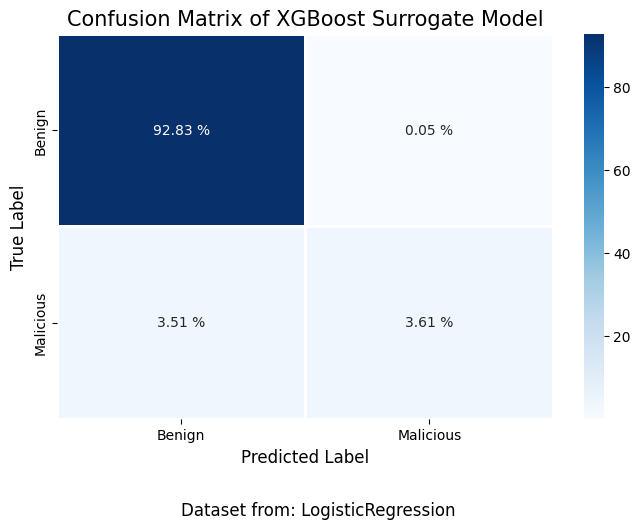

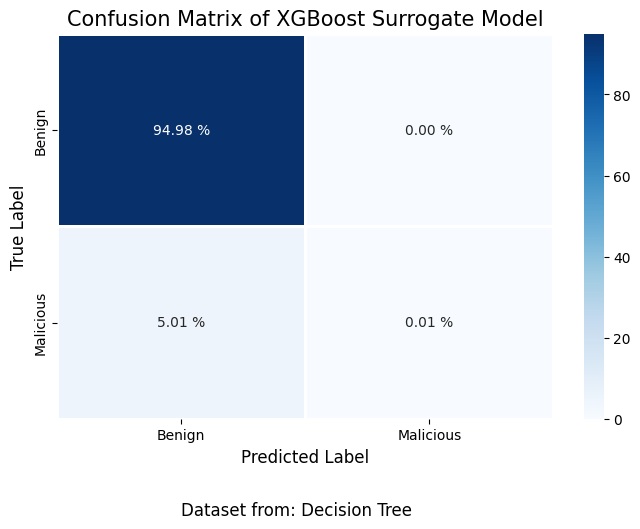

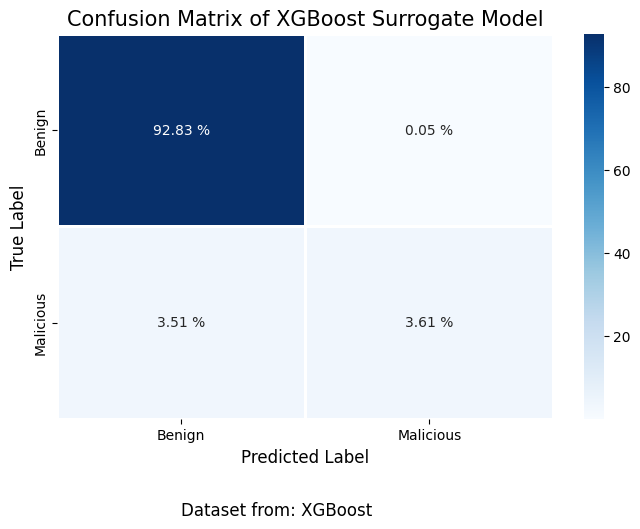

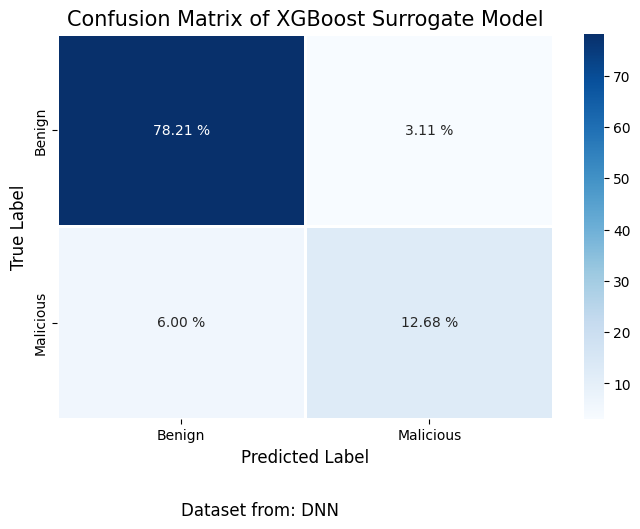

In [14]:
draw_confusion_matrix(y_test_lr_predicted, y_xgbpred_from_lrdata, xgb_model_from_lrdata, 'XGBoost', "LogisticRegression")
draw_confusion_matrix(y_test_dt_predicted, y_xgbpred_from_dtdata, xgb_model_from_dtdata, 'XGBoost', "Decision Tree")
draw_confusion_matrix(y_test_xgb_predicted, y_xgbpred_from_xgbdata, xgb_model_from_xgbdata, 'XGBoost', "XGBoost")
draw_confusion_matrix(y_test_dnn_predicted, y_xgbpred_from_dnndata, xgb_model_from_dnndata, 'XGBoost', "DNN")

### Save Model

In [15]:
import torch
import pickle

# save model
# pickle.dump(model_dt, open("../target_model/ml_model/target_dt.pickle", "wb")) # target_model\ml_model
# pickle.dump(model_lr, open("../target_model/ml_model/target_lr.pickle", "wb"))

pickle.dump(lr_model_from_lrdata, open("../surrogate_model/ml_model/lr_model_from_lrdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(lr_model_from_dtdata, open("../surrogate_model/ml_model/lr_model_from_dtdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(lr_model_from_dnndata, open("../surrogate_model/ml_model/lr_model_from_dnndata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(lr_model_from_xgbdata, open("../surrogate_model/ml_model/lr_model_from_xgbdata.pickle", "wb")) # surrogate_model\ml_model

pickle.dump(dt_model_from_lrdata, open("../surrogate_model/ml_model/dt_model_from_lrdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(dt_model_from_dtdata, open("../surrogate_model/ml_model/dt_model_from_dtdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(dt_model_from_dnndata, open("../surrogate_model/ml_model/dt_model_from_dnndata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(dt_model_from_xgbdata, open("../surrogate_model/ml_model/dt_model_from_xgbdata.pickle", "wb")) # surrogate_model\ml_model

pickle.dump(xgb_model_from_lrdata, open("../surrogate_model/ml_model/xgb_model_from_lrdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(xgb_model_from_dtdata, open("../surrogate_model/ml_model/xgb_model_from_dtdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(xgb_model_from_dnndata, open("../surrogate_model/ml_model/xgb_model_from_dnndata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(xgb_model_from_xgbdata, open("../surrogate_model/ml_model/xgb_model_from_xgbdata.pickle", "wb")) # surrogate_model\ml_model

